<a href="https://colab.research.google.com/github/jajapuramshivasai/Advanced-Experimental-Techniques-in-Quantum-Materials/blob/main/Thin_Film_Al.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

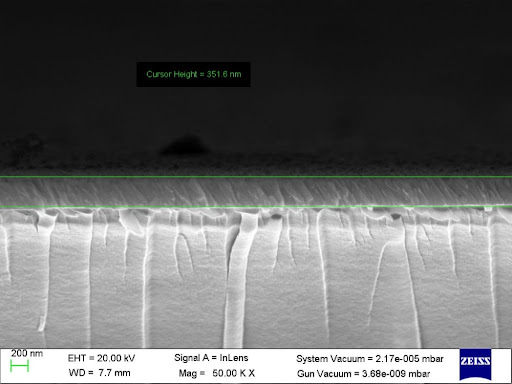


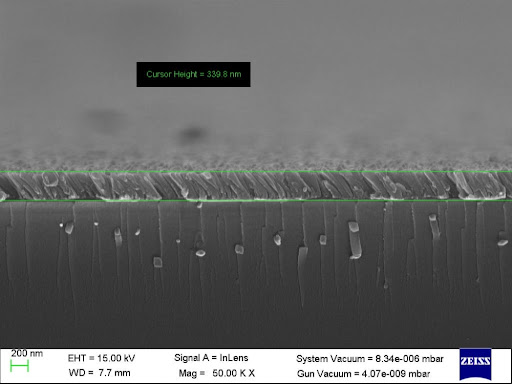


## Aluminium thin film on glass substrate fabricated by Thermal Vapour Deposition (TVD) Technique at Complex Heteroxide Lab

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Linear geometry


 four Probe in linear geometry at edge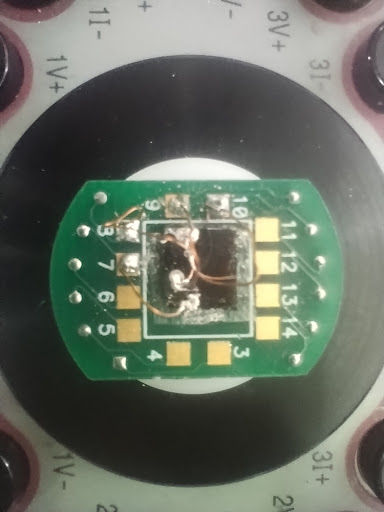

# Van der Pauw Geometry

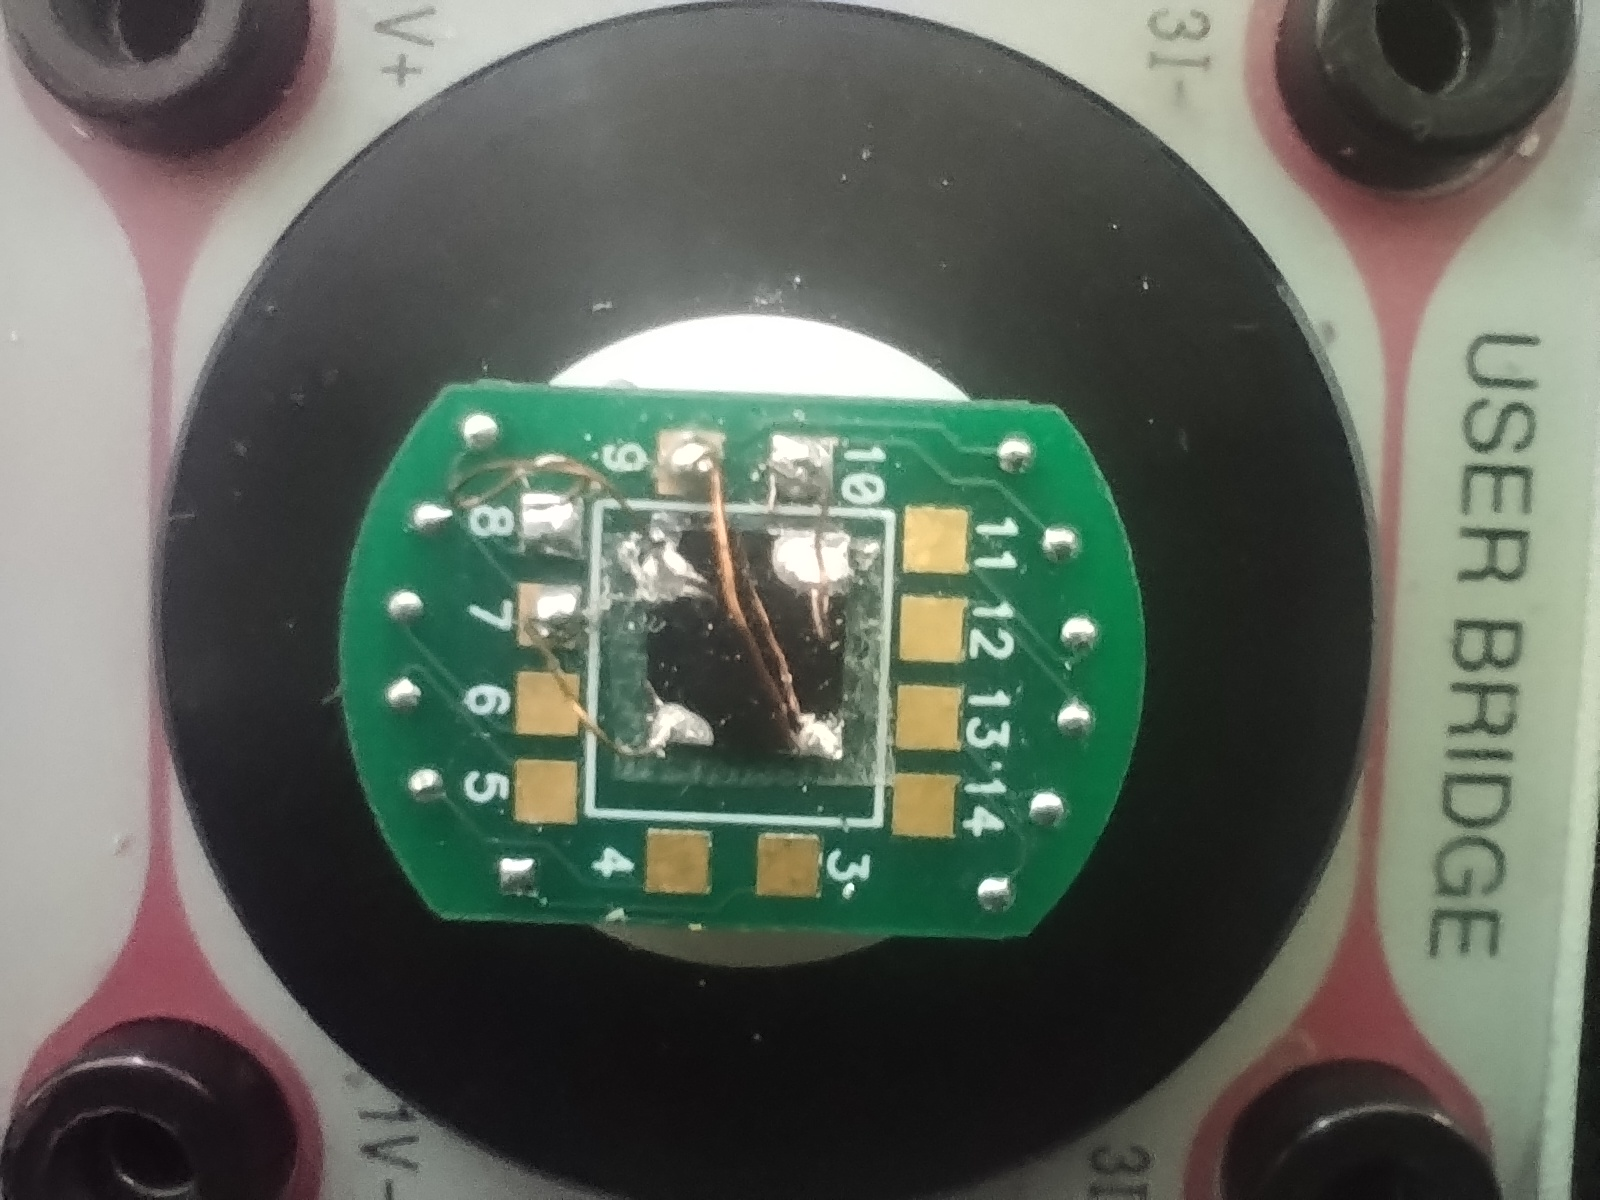

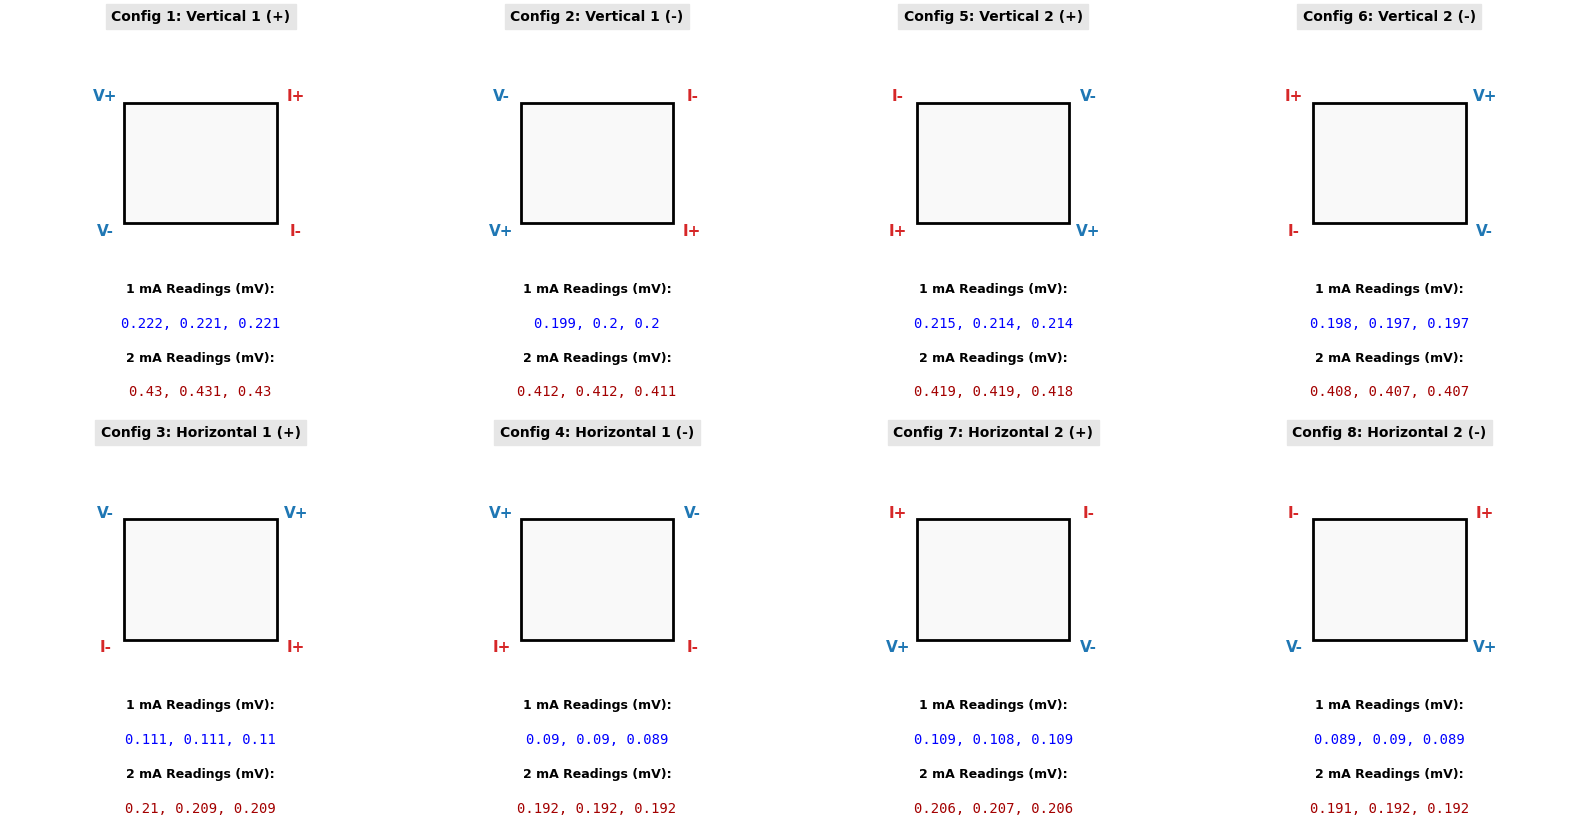

In [2]:
#@title Raw data per each configuration
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# --- 1. DATA ENTRY (Raw Voltage in mV) ---
# Format: { 'pins': {Corner: Label}, 'V_1mA': [list], 'V_2mA': [list] }
# All negative values from the log are converted to absolute values for clarity here.

configs = [
    # --- Vertical Group ---
    {
        'title': 'Config 1: Vertical 1 (+)',
        'pins': {'TR': 'I+', 'BR': 'I-', 'TL': 'V+', 'BL': 'V-'},
        'V_1mA': [0.222, 0.221, 0.221],
        'V_2mA': [0.430, 0.431, 0.430]
    },
    {
        'title': 'Config 2: Vertical 1 (-)',
        'pins': {'TR': 'I-', 'BR': 'I+', 'TL': 'V-', 'BL': 'V+'},
        'V_1mA': [0.199, 0.200, 0.200],  # Abs values
        'V_2mA': [0.412, 0.412, 0.411]   # Abs values
    },
    {
        'title': 'Config 5: Vertical 2 (+)',
        'pins': {'TL': 'I-', 'BL': 'I+', 'TR': 'V-', 'BR': 'V+'},
        'V_1mA': [0.215, 0.214, 0.214],
        'V_2mA': [0.419, 0.419, 0.418]
    },
    {
        'title': 'Config 6: Vertical 2 (-)',
        'pins': {'TL': 'I+', 'BL': 'I-', 'TR': 'V+', 'BR': 'V-'},
        'V_1mA': [0.198, 0.197, 0.197],  # Abs values
        'V_2mA': [0.408, 0.407, 0.407]   # Abs values
    },

    # --- Horizontal Group ---
    {
        'title': 'Config 3: Horizontal 1 (+)',
        'pins': {'BR': 'I+', 'BL': 'I-', 'TR': 'V+', 'TL': 'V-'},
        'V_1mA': [0.111, 0.111, 0.110],
        'V_2mA': [0.210, 0.209, 0.209]
    },
    {
        'title': 'Config 4: Horizontal 1 (-)',
        'pins': {'BR': 'I-', 'BL': 'I+', 'TR': 'V-', 'TL': 'V+'},
        'V_1mA': [0.090, 0.090, 0.089],  # Abs values
        'V_2mA': [0.192, 0.192, 0.192]   # Abs values
    },
    {
        'title': 'Config 7: Horizontal 2 (+)',
        'pins': {'TL': 'I+', 'TR': 'I-', 'BL': 'V+', 'BR': 'V-'},
        'V_1mA': [0.109, 0.108, 0.109],
        'V_2mA': [0.206, 0.207, 0.206]
    },
    {
        'title': 'Config 8: Horizontal 2 (-)',
        'pins': {'TL': 'I-', 'TR': 'I+', 'BL': 'V-', 'BR': 'V+'},
        'V_1mA': [0.089, 0.090, 0.089],  # Abs values
        'V_2mA': [0.191, 0.192, 0.192]   # Abs values
    }
]

def draw_schematic(ax, config):
    # 1. Draw the Square
    # (x, y, width, height)
    rect = patches.Rectangle((0.3, 0.55), 0.4, 0.35, linewidth=2, edgecolor='black', facecolor='#f9f9f9')
    ax.add_patch(rect)

    # 2. Add Pins (TL, TR, BL, BR)
    pins = config['pins']
    # Coordinates relative to axes (0-1)
    coords = {
        'TL': (0.25, 0.92), 'TR': (0.75, 0.92),
        'BL': (0.25, 0.53), 'BR': (0.75, 0.53)
    }

    for corner, label in pins.items():
        # Red for Current (I), Blue for Voltage (V)
        color = '#d62728' if 'I' in label else '#1f77b4'
        ax.text(coords[corner][0], coords[corner][1], label,
                ha='center', va='center', fontsize=11, fontweight='bold', color=color)

    # 3. Print Data Tables below
    # Format list as string: "[0.222, 0.221, 0.221]"
    v1_str = str(config['V_1mA']).replace('[', '').replace(']', '')
    v2_str = str(config['V_2mA']).replace('[', '').replace(']', '')

    ax.text(0.5, 0.35, f"1 mA Readings (mV):", ha='center', fontsize=9, fontweight='bold')
    ax.text(0.5, 0.25, v1_str, ha='center', fontsize=10, fontfamily='monospace', color='blue')

    ax.text(0.5, 0.15, f"2 mA Readings (mV):", ha='center', fontsize=9, fontweight='bold')
    ax.text(0.5, 0.05, v2_str, ha='center', fontsize=10, fontfamily='monospace', color='#a30000')

    # 4. Cleanup
    ax.set_title(config['title'], fontsize=10, fontweight='bold', pad=10, backgroundcolor='#e6e6e6')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1.1)
    ax.axis('off')

# --- MAIN PLOT GENERATION ---
fig, axes = plt.subplots(2, 4, figsize=(16, 9))
axes = axes.flatten()

for i, ax in enumerate(axes):
    draw_schematic(ax, configs[i])

# Layout adjustments
plt.tight_layout()
plt.subplots_adjust(top=0.9) # Make room for main title if needed

plt.show()

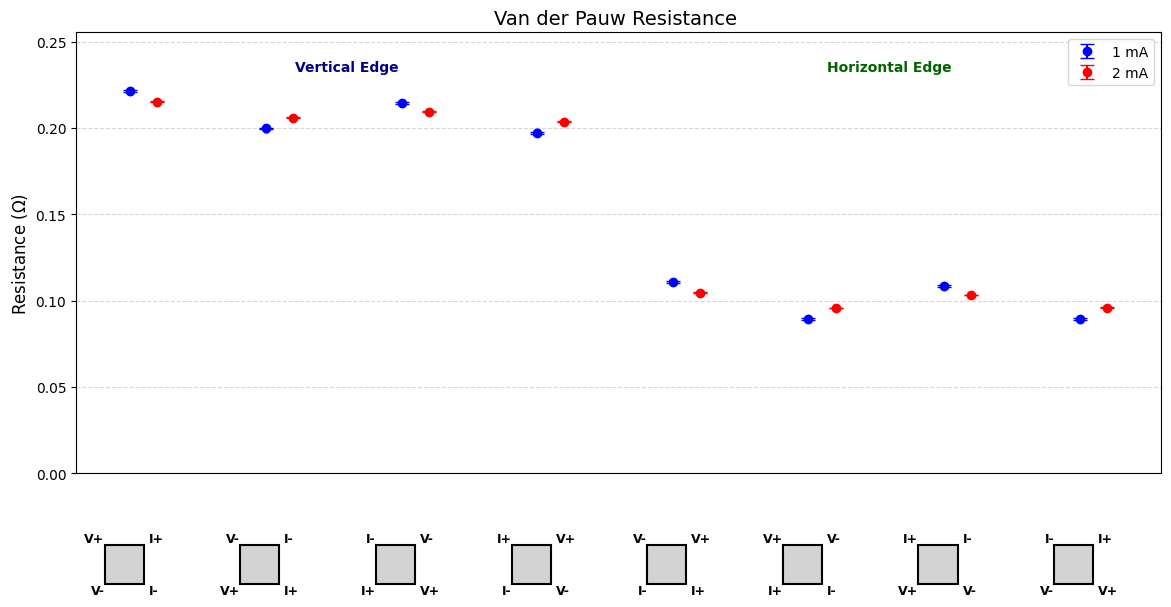

In [3]:
#@title Resistances per each configurations
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# --- 1. DATA ENTRY ---
# Format: { 'Config Label': {'pins': {Positions}, '1mA': [Readings], '2mA': [Readings]} }

data = {
    0: {
        'label': 'Vert 1 (+)',
        'pins': {'TR': 'I+', 'BR': 'I-', 'TL': 'V+', 'BL': 'V-'},
        '1mA': [0.222, 0.221, 0.221],
        '2mA': [0.430/2, 0.431/2, 0.430/2]
    },
    1: {
        'label': 'Vert 1 (-)',
        'pins': {'TR': 'I-', 'BR': 'I+', 'TL': 'V-', 'BL': 'V+'},
        '1mA': [0.199, 0.200, 0.200],
        '2mA': [0.412/2, 0.412/2, 0.411/2]
    },
    2: {
        'label': 'Vert 2 (+)',
        'pins': {'TL': 'I-', 'BL': 'I+', 'TR': 'V-', 'BR': 'V+'},
        '1mA': [0.215, 0.214, 0.214],
        '2mA': [0.419/2, 0.419/2, 0.418/2]
    },
    3: {
        'label': 'Vert 2 (-)',
        'pins': {'TL': 'I+', 'BL': 'I-', 'TR': 'V+', 'BR': 'V-'},
        '1mA': [0.198, 0.197, 0.197],
        '2mA': [0.408/2, 0.407/2, 0.407/2]
    },
    4: {
        'label': 'Horiz 1 (+)',
        'pins': {'BR': 'I+', 'BL': 'I-', 'TR': 'V+', 'TL': 'V-'},
        '1mA': [0.111, 0.111, 0.110],
        '2mA': [0.210/2, 0.209/2, 0.209/2]
    },
    5: {
        'label': 'Horiz 1 (-)',
        'pins': {'BR': 'I-', 'BL': 'I+', 'TR': 'V-', 'TL': 'V+'},
        '1mA': [0.090, 0.090, 0.089],
        '2mA': [0.192/2, 0.192/2, 0.192/2]
    },
    6: {
        'label': 'Horiz 2 (+)',
        'pins': {'TL': 'I+', 'TR': 'I-', 'BL': 'V+', 'BR': 'V-'},
        '1mA': [0.109, 0.108, 0.109],
        '2mA': [0.206/2, 0.206/2, 0.206/2]
    },
    7: {
        'label': 'Horiz 2 (-)',
        'pins': {'TL': 'I-', 'TR': 'I+', 'BL': 'V-', 'BR': 'V+'},
        '1mA': [0.089, 0.090, 0.089],
        '2mA': [0.191/2, 0.192/2, 0.192/2]
    }
}

# --- 2. PLOTTING SETUP ---
fig, ax = plt.subplots(figsize=(14, 7))
plt.subplots_adjust(bottom=0.25) # Make room for squares at bottom

# --- 3. GENERATE MAIN PLOT ---
width = 0.2
x_indices = np.arange(len(data))

# Store max resistance for scaling
max_r = 0

for i, config in data.items():
    r1 = config['1mA']
    r2 = config['2mA']

    # Update Max R for plot limits
    max_r = max(max_r, np.max(r1), np.max(r2))

    # Calculate Stats
    m1, s1 = np.mean(r1), np.std(r1, ddof=1)
    m2, s2 = np.mean(r2), np.std(r2, ddof=1)

    # Plot 1mA (Blue)
    ax.errorbar(i - width/2, m1, yerr=s1, fmt='o', color='blue', capsize=5,
                label='1 mA' if i==0 else "")
    ax.scatter([i - width/2]*len(r1), r1, color='blue', alpha=0.3, s=20)

    # Plot 2mA (Red)
    ax.errorbar(i + width/2, m2, yerr=s2, fmt='o', color='red', capsize=5,
                label='2 mA' if i==0 else "")
    ax.scatter([i + width/2]*len(r2), r2, color='red', alpha=0.3, s=20)

# Formatting
ax.set_xticks([]) # Hide default x-ticks
ax.set_ylabel('Resistance ($\Omega$)', fontsize=12)
ax.set_title('Van der Pauw Resistance ', fontsize=14)
ax.set_xlim(-0.5, 7.5)
ax.set_ylim(0, max_r * 1.15)
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.legend(loc='upper right')

# --- 4. DRAW SQUARES (CORRECTED ASPECT RATIO) ---

def draw_square_schematic(fig, center_x_display, center_y_display, size_display, pins):
    """
    Draws a square directly on the figure using display coordinates (0-1)
    to ensure aspect ratio is perfectly 1:1 (square), not compressed.
    """
    # Create a new axes for just this square to control aspect ratio perfectly
    # [left, bottom, width, height]
    ax_sq = fig.add_axes([center_x_display - size_display/2,
                          center_y_display - size_display/2,
                          size_display, size_display])

    # Remove axis lines/ticks
    ax_sq.set_axis_off()
    ax_sq.set_xlim(0, 1)
    ax_sq.set_ylim(0, 1)

    # Draw the box
    rect = patches.Rectangle((0.1, 0.1), 0.4, 0.8, linewidth=1.5, edgecolor='black', facecolor='lightgrey')
    ax_sq.add_patch(rect)

    # Font settings
    fs = 9
    fw = 'bold'

    # Pins
    ax_sq.text(0.1, 0.9, pins.get('TL', ''), ha='right', va='bottom', fontsize=fs, fontweight=fw)
    ax_sq.text(0.55, 0.9, pins.get('TR', ''), ha='left', va='bottom', fontsize=fs, fontweight=fw)
    ax_sq.text(0.1, 0.1, pins.get('BL', ''), ha='right', va='top', fontsize=fs, fontweight=fw)
    ax_sq.text(0.55, 0.1, pins.get('BR', ''), ha='left', va='top', fontsize=fs, fontweight=fw)

# Calculate positions for squares
# We map data coordinates (0, 1, 2...) to Figure coordinates (0.0 to 1.0)
inv = ax.transData.inverted()

# Iterate to place squares
for i in range(len(data)):
    # Get the display coordinate of x=i
    # We transform (i, 0) from data to display coords
    pt_disp = ax.transData.transform((i, 0))

    # Convert display coords (pixels) to figure coords (0-1)
    x_fig = pt_disp[0] / fig.bbox.width

    # Y Position fixed at bottom of figure (e.g., 0.1)
    y_fig = 0.12

    # Draw
    size = 0.07 # Size in figure coordinates (0.09 = 9% of figure width)
    draw_square_schematic(fig, x_fig, y_fig, size, data[i]['pins'])

# Add grouping text
ax.text(1.5, max_r * 1.05, "Vertical Edge", ha='center',
        color='darkblue', fontweight='bold')
ax.text(5.5, max_r * 1.05, "Horizontal Edge", ha='center',
        color='darkgreen', fontweight='bold')
plt.axvline(3.5, color='gray', linestyle='--', alpha=0.5)

plt.show()